In [3]:
import pandas as pd

path = r"UHT milk P036.csv"
 
df = pd.read_csv(path)
df


,Protein Group,Protein ID,Protein Accession,Peptide,Unique,-10lgP,Mass,Length,ppm,m/z,...,#Feature,#Feature Sample 1,#Feature Sample 2,#Feature Sample 3,#Feature Sample 4,Start,End,PTM,AScore,Found By
0,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWMHQPHQPLPPTVMF...,Y,76.82,6358.2485,56,-1.7,1272.6473,...,20,6,5,3,6,129,184,NaN,NaN,PEAKS DB
1,3,10,P02666,R.DMPIQAFLLYQEPVLGPVRGPFPIIV,Y,75.16,2908.5923,26,-2.9,1455.2933,...,12,3,4,2,3,199,224,NaN,NaN,PEAKS DB
2,3,10,P02666,R.DM(+15.99)PIQAFLLYQEPVLGPVRGPFPIIV,Y,70.64,2924.5874,26,-3.3,1463.2902,...,8,2,2,2,2,199,224,Oxidation (M),M2:Oxidation (M):1000.00,PEAKS DB
3,3,10,P02666,S.QSLTLTDVENLHLPLPLLQSWMHQPHQPLPPTVMFPPQSVLSLS...,Y,70.17,5308.7778,47,-1.4,1328.1945,...,5,2,1,1,1,138,184,NaN,NaN,PEAKS DB
4,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLP.L,Y,69.89,2838.4326,25,-2.1,1420.2148,...,12,4,2,2,4,129,153,NaN,NaN,PEAKS DB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,104,132,A5D9E6,E.TSK(-18.01)GDQLSK.S,Y,25.37,944.4927,9,-9.2,473.2478,...,1,0,0,0,1,151,159,lal,K3:lal:0.00,PEAKS DB
5373,87,123,A7E3W7,M.QAS(-18.01)LDLGTD.K,Y,25.25,900.4189,9,4.5,901.4262,...,1,0,0,1,0,162,170,lal,S3:lal:1000.00,PEAKS DB
5374,86,128,E1BLY0,E.GS(-18.01)K(-18.01)AAGG.G,Y,25.05,510.2550,7,-5.1,511.2567,...,1,1,0,0,0,646,652,lal,S2:lal:1000.00;K3:lal:1000.00,PEAKS DB
5375,91,130,A5D9D1,G.S(-18.01)GIYAPHSP.K,Y,24.64,909.4344,9,10.1,910.4456,...,1,1,0,0,0,224,232,lal,S1:lal:15.21,PEAKS DB


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

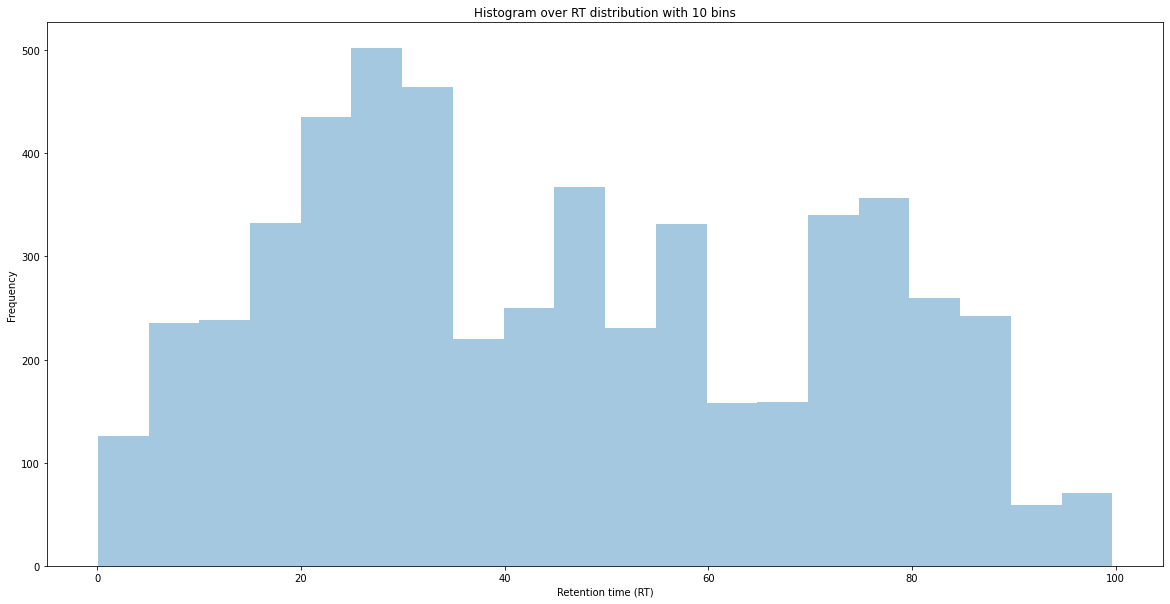

In [115]:
import seaborn as sns
from matplotlib import pyplot as plt

# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(20,10))
#sns.distplot(df['RT'], kde=False, hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})
sns.distplot(df['RT'], kde=False)
(n, bins) = np.histogram(df['RT'])
plt.title(f"Histogram over RT distribution with {len(n)} bins")
plt.xlabel('Retention time (RT)')
plt.ylabel('Frequency')

In [148]:
import numpy as np
def count_no_of_modifications(ptm_str):
    #check if NaN value
    if pd.isnull(ptm_str):
        return 0
    return 1 + ptm_str.count(';')

#apply count_no_of_modifications to each PTM column
df['#modifications'] = df['PTM'].apply(count_no_of_modifications)
#print non zero values in modifcations column
df[df['#modifications'] > 0]

,Protein Group,Protein ID,Protein Accession,Peptide,Unique,-10lgP,Mass,Length,ppm,m/z,...,#Feature Sample 2,#Feature Sample 3,#Feature Sample 4,Start,End,PTM,AScore,Found By,#modifications,mass/len
2,3,10,P02666,R.DM(+15.99)PIQAFLLYQEPVLGPVRGPFPIIV,Y,70.64,2924.5874,26,-3.3,1463.2902,...,2,2,2,199,224,Oxidation (M),M2:Oxidation (M):1000.00,PEAKS DB,1,112.484131
5,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQ(+.98)S(-18.01)W...,Y,69.56,6357.2168,56,8.7,1272.4542,...,0,1,1,129,184,Deamidation (NQ); lal; Oxidation (M),Q28:Deamidation (NQ):10.19;S29:lal:71.89;M31:O...,PEAKS DB,3,113.521729
8,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWM(+15.99)HQPHQ...,Y,65.11,6374.2437,56,2.4,1275.8551,...,3,0,1,129,184,Oxidation (M),M31:Oxidation (M):111.64,PEAKS DB,1,113.825780
9,3,10,P02666,A.RELEELNVPGEIVESLS(+79.97)S(+79.97)S(+79.97)E...,Y,64.46,3041.2920,25,-2.1,1521.6434,...,2,3,1,16,40,Phosphorylation (STY),S17:Phosphorylation (STY):30.83;S18:Phosphoryl...,PEAKS DB,1,121.651680
11,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWMHQ(+.98)PHQPL...,Y,63.57,6359.2324,56,0.2,1272.8501,...,0,1,0,129,184,Deamidation (NQ),Q33:Deamidation (NQ):10.19,PEAKS DB,1,113.557721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,104,132,A5D9E6,E.TSK(-18.01)GDQLSK.S,Y,25.37,944.4927,9,-9.2,473.2478,...,0,0,1,151,159,lal,K3:lal:0.00,PEAKS DB,1,104.943633
5373,87,123,A7E3W7,M.QAS(-18.01)LDLGTD.K,Y,25.25,900.4189,9,4.5,901.4262,...,0,1,0,162,170,lal,S3:lal:1000.00,PEAKS DB,1,100.046544
5374,86,128,E1BLY0,E.GS(-18.01)K(-18.01)AAGG.G,Y,25.05,510.2550,7,-5.1,511.2567,...,0,0,0,646,652,lal,S2:lal:1000.00;K3:lal:1000.00,PEAKS DB,1,72.893571
5375,91,130,A5D9D1,G.S(-18.01)GIYAPHSP.K,Y,24.64,909.4344,9,10.1,910.4456,...,0,0,0,224,232,lal,S1:lal:15.21,PEAKS DB,1,101.048267


Text(0, 0.5, 'Count')

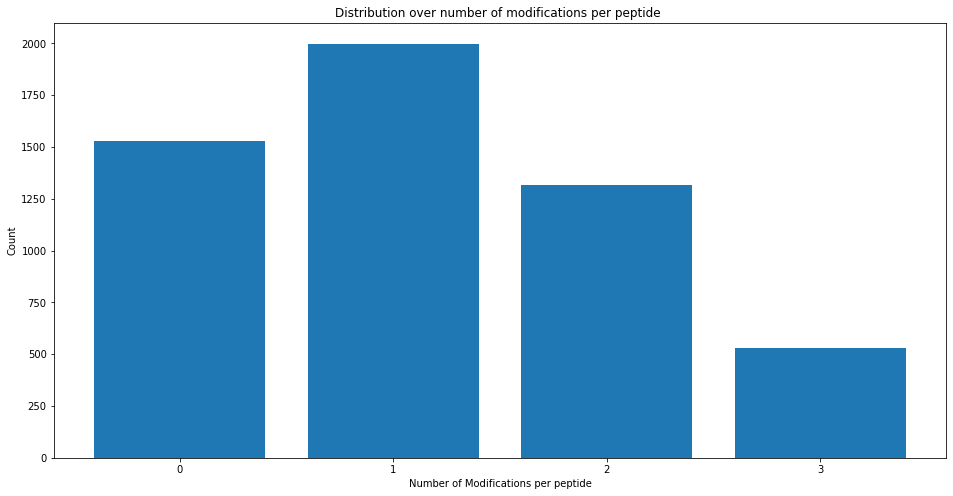

In [120]:

#Column chart (a.k.a. Bar Chart) showing distribution of modifications per peptide
plt.figure(figsize=(16,8))
plt.bar(df['#modifications'].value_counts().index, df['#modifications'].value_counts())
plt.xticks(np.arange(0,4))
plt.title("Distribution over number of modifications per peptide ")
plt.xlabel('Number of Modifications per peptide')
plt.ylabel('Count')

<AxesSubplot:xlabel='#modifications', ylabel='Mass'>

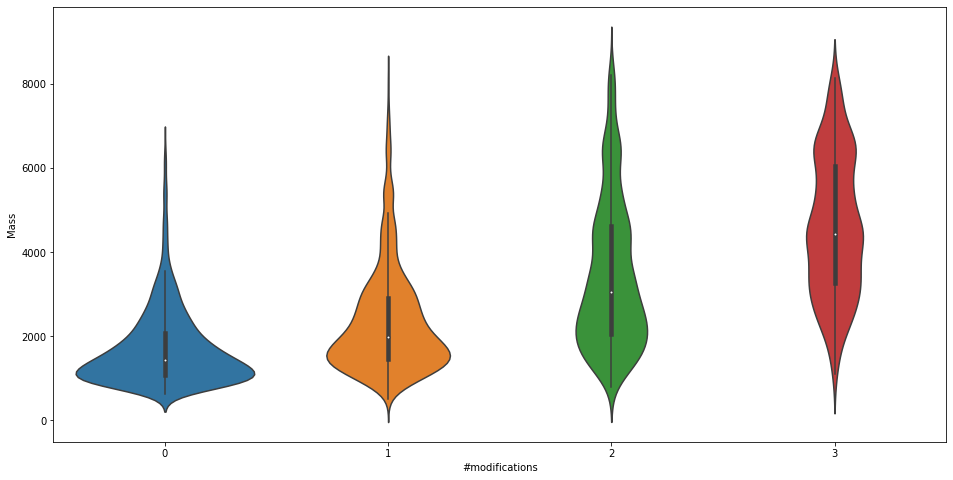

In [150]:
#violin plot showing distribution of number of modifications per peptide vs Mass
plt.figure(figsize=(16,8))
#sns.swarmplot(x='#modifications', y='Mass', data=df )
sns.violinplot(x='#modifications', y='Mass', data=df )

<AxesSubplot:xlabel='#modifications', ylabel='Length'>

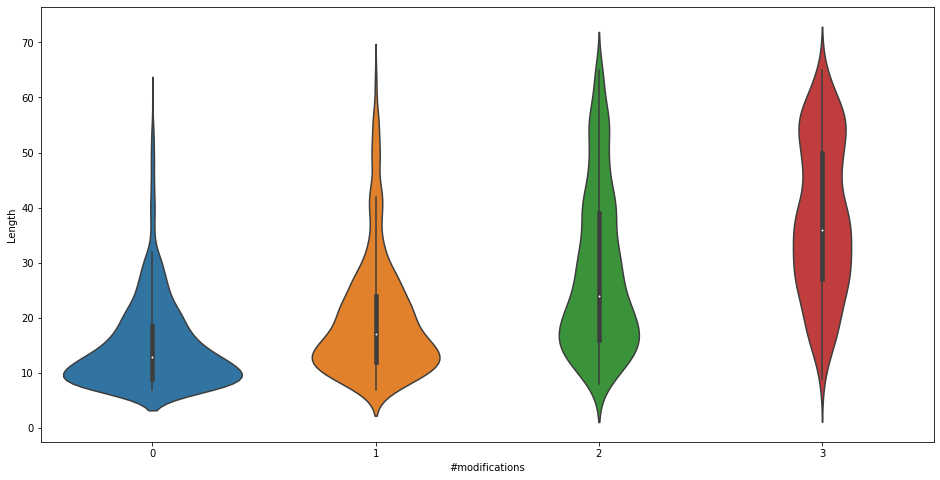

In [146]:
#violin plot showing distribution of number of modifications per peptide vs Length
plt.figure(figsize=(16,8))
sns.violinplot(x='#modifications', y='Length', data=df )


<AxesSubplot:xlabel='#modifications', ylabel='mass/len'>

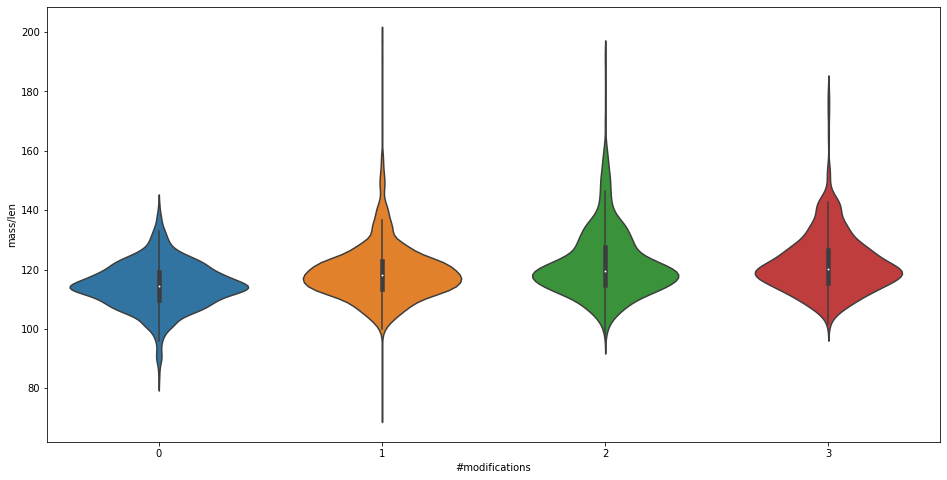

In [152]:
#create new column
df['mass/len']= df['Mass']/df['Length']

#violin plot showing distribution of number of modifications per peptide vs Mass/Length
plt.figure(figsize=(16,8))
sns.violinplot(x='#modifications', y='mass/len', data=df )


<AxesSubplot:xlabel='#modifications', ylabel='mass/len'>

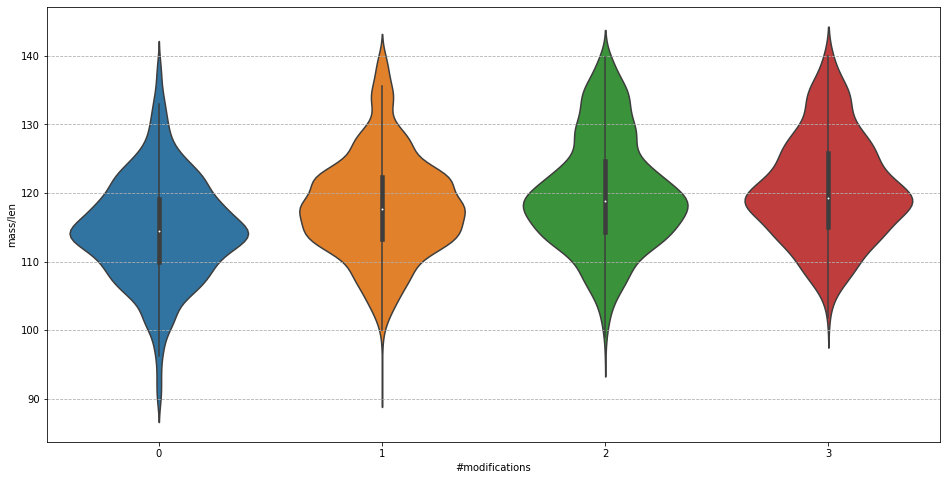

In [160]:
#create new column
df_short_mass = df[df['mass/len'] > 90]
df_short_mass = df_short_mass[df_short_mass['mass/len'] < 140]

#violin plot showing distribution of number of modifications per peptide vs Mass/Length
plt.figure(figsize=(16,8))
plt.grid( linestyle='--')
sns.violinplot(x='#modifications', y='mass/len', data=df_short_mass )


<AxesSubplot:xlabel='Mass', ylabel='-10lgP'>

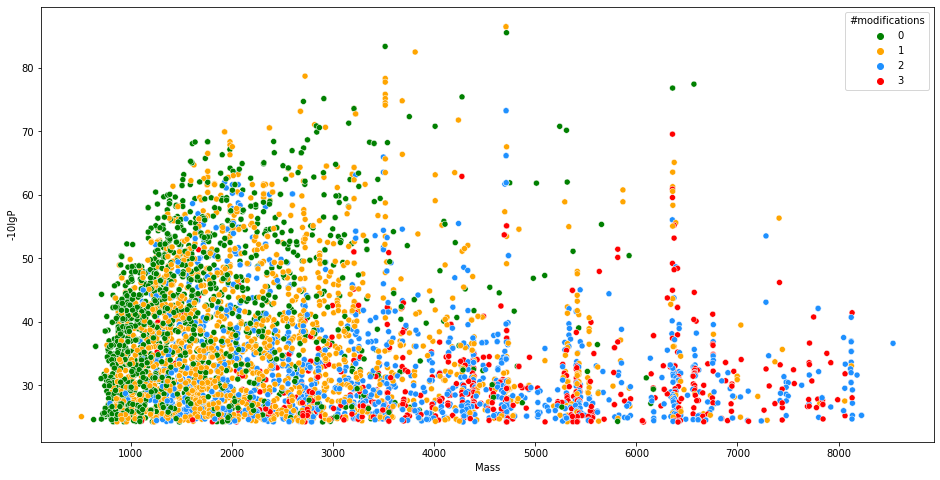

In [144]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Mass', y='-10lgP', data=df ,hue='#modifications', palette = ['green','orange','dodgerblue','red'], legend='full')

<AxesSubplot:xlabel='None-#modifications', ylabel='Length'>

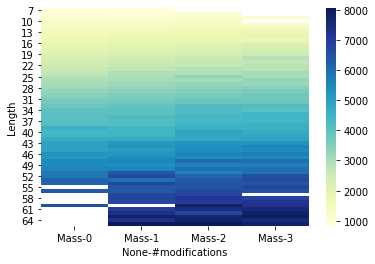

In [142]:
# _len = df['Length'].to_numpy()
# _mass = df['Mass'].to_numpy()
# _mods = df['#modifications'].to_numpy()
piv = pd.pivot_table(df, index=['Length'], columns=['#modifications'], values=['Mass'], aggfunc=np.mean)
sns.heatmap(piv, fmt="g", cmap="YlGnBu")

<AxesSubplot:xlabel='RT'>

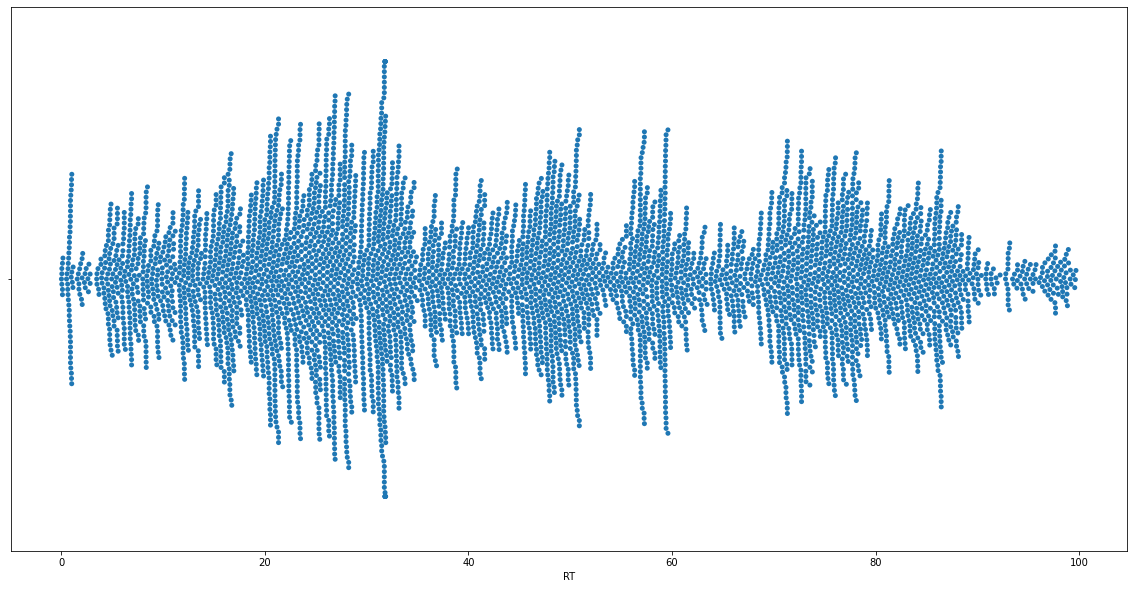

In [161]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(20,10))
sns.swarmplot(x='RT', data=df)


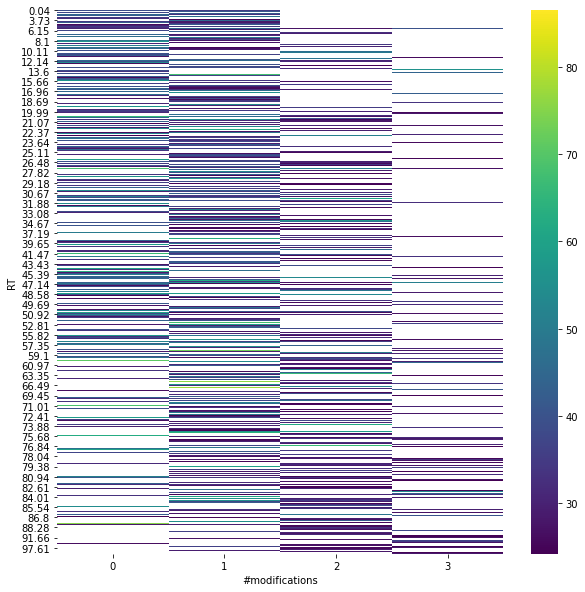

In [114]:
piv = pd.pivot_table(df, values='-10lgP', index='RT', columns='#modifications')
plt.figure(figsize=(10,10))
sns.heatmap(piv, cmap='viridis')

<AxesSubplot:xlabel='RT'>

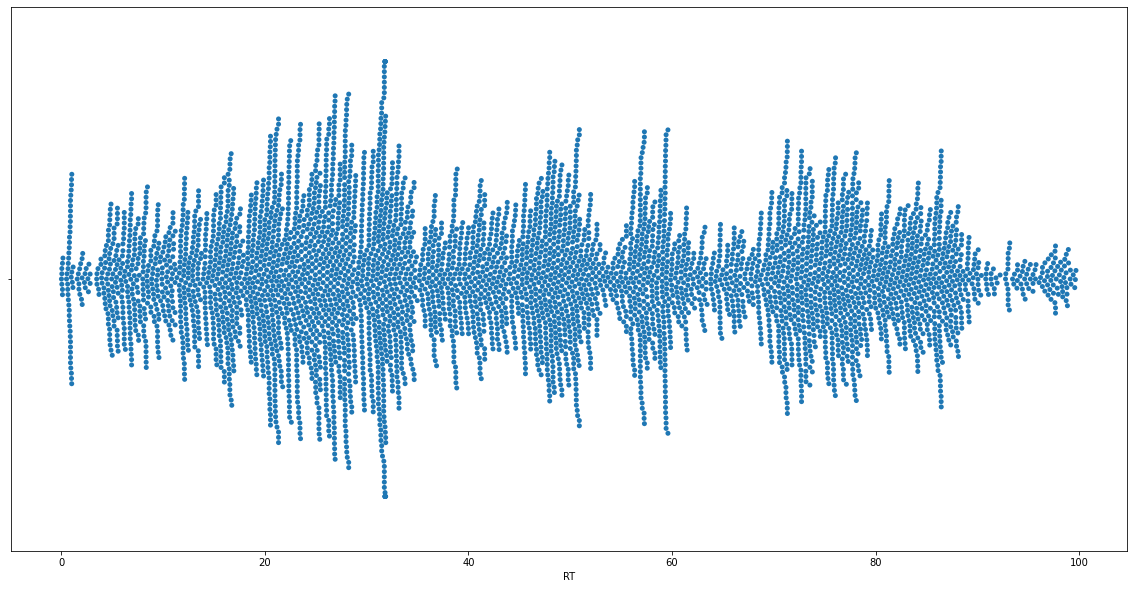

In [12]:
# Count Plot (a.k.a. Bar Plot) #BEFORE adding modifications
plt.figure(figsize=(20,10))
sns.swarmplot(x='RT', data=df)

Index(['Protein Group', 'Protein Accession', 'Peptide', '-10lgP', 'Mass',
       'Length', 'ppm', 'z', 'RT', 'Area Sample 1', 'Area Sample 2',
       'Area Sample 3', 'Area Sample 4', 'Fraction', '#Feature',
       '#Feature Sample 1', '#Feature Sample 2', '#Feature Sample 3',
       '#Feature Sample 4', 'Start', 'End', 'PTM', 'AScore'],
      dtype='object')


<AxesSubplot:>

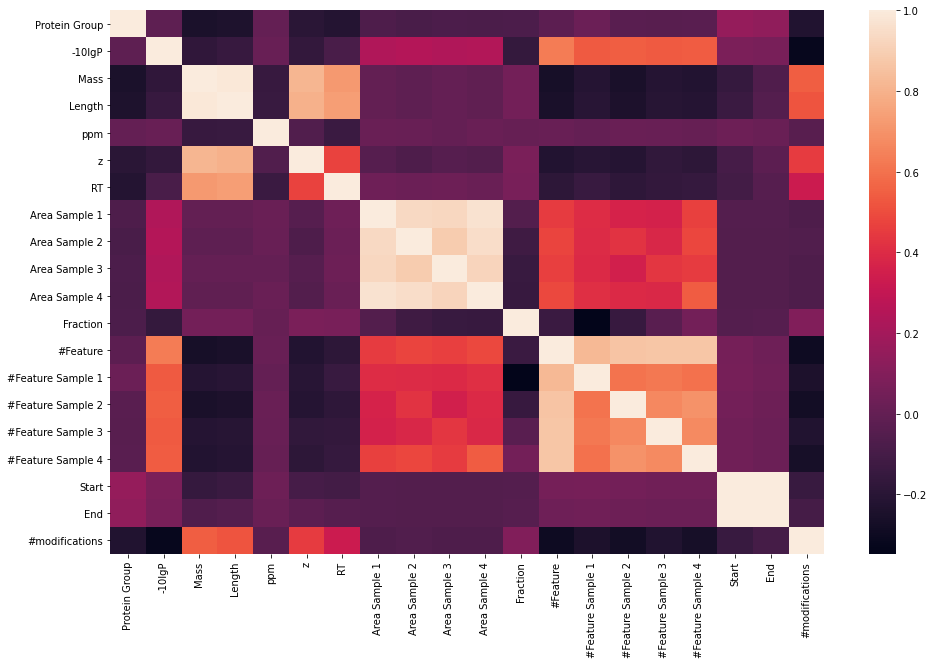

In [74]:
from utils import get_data_and_remove_unwanted_columns

df_modific = df[df['#modifications'] > 0]
df_unwanted = get_data_and_remove_unwanted_columns()
df_unwanted['#modifications'] = df_unwanted['PTM'].apply(count_no_of_modifications)
plt.figure(figsize=(16,10))
sns.heatmap(df_unwanted.corr())

<AxesSubplot:>

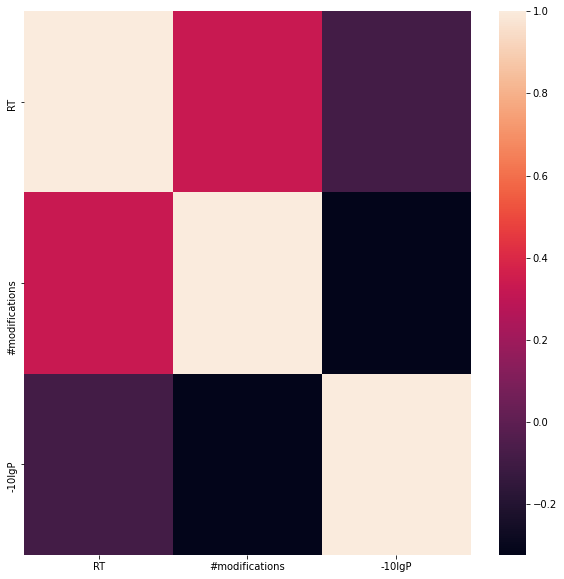

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(df_unwanted[['RT','#modifications','-10lgP']].corr())

<AxesSubplot:xlabel='RT', ylabel='-10lgP'>

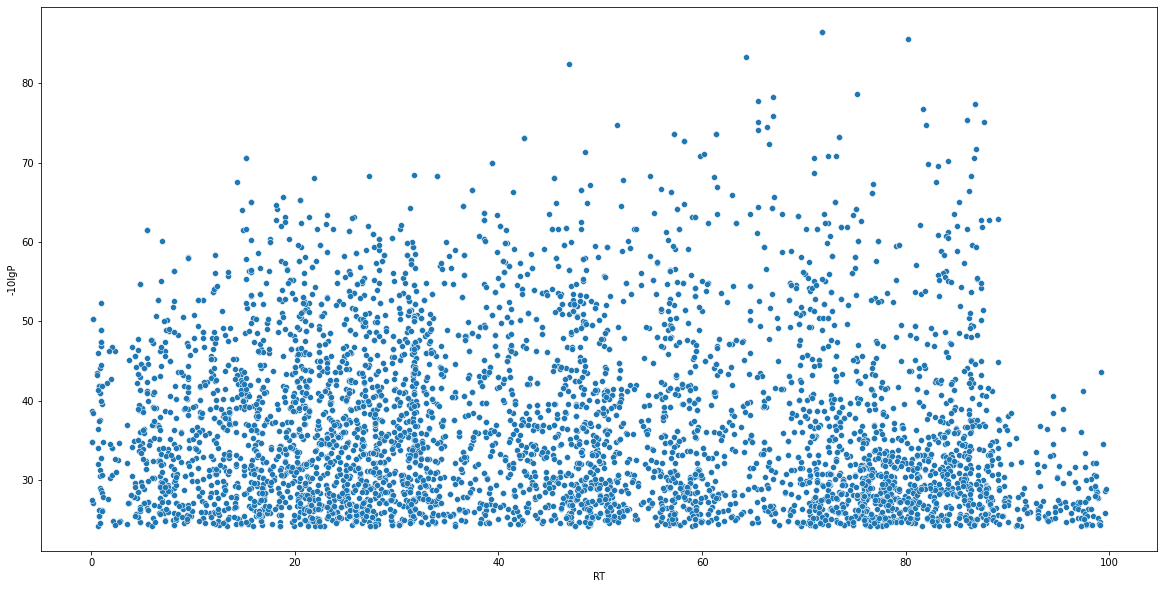

In [39]:
plt.figure(figsize=(20,10))
sns.scatterplot(y="-10lgP", x="RT", data=df)

Text(0, 0.5, 'Count')

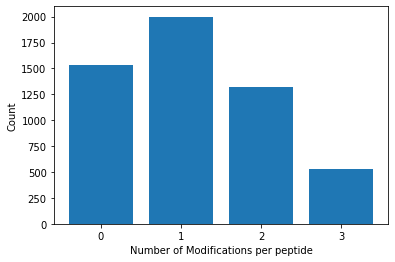

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


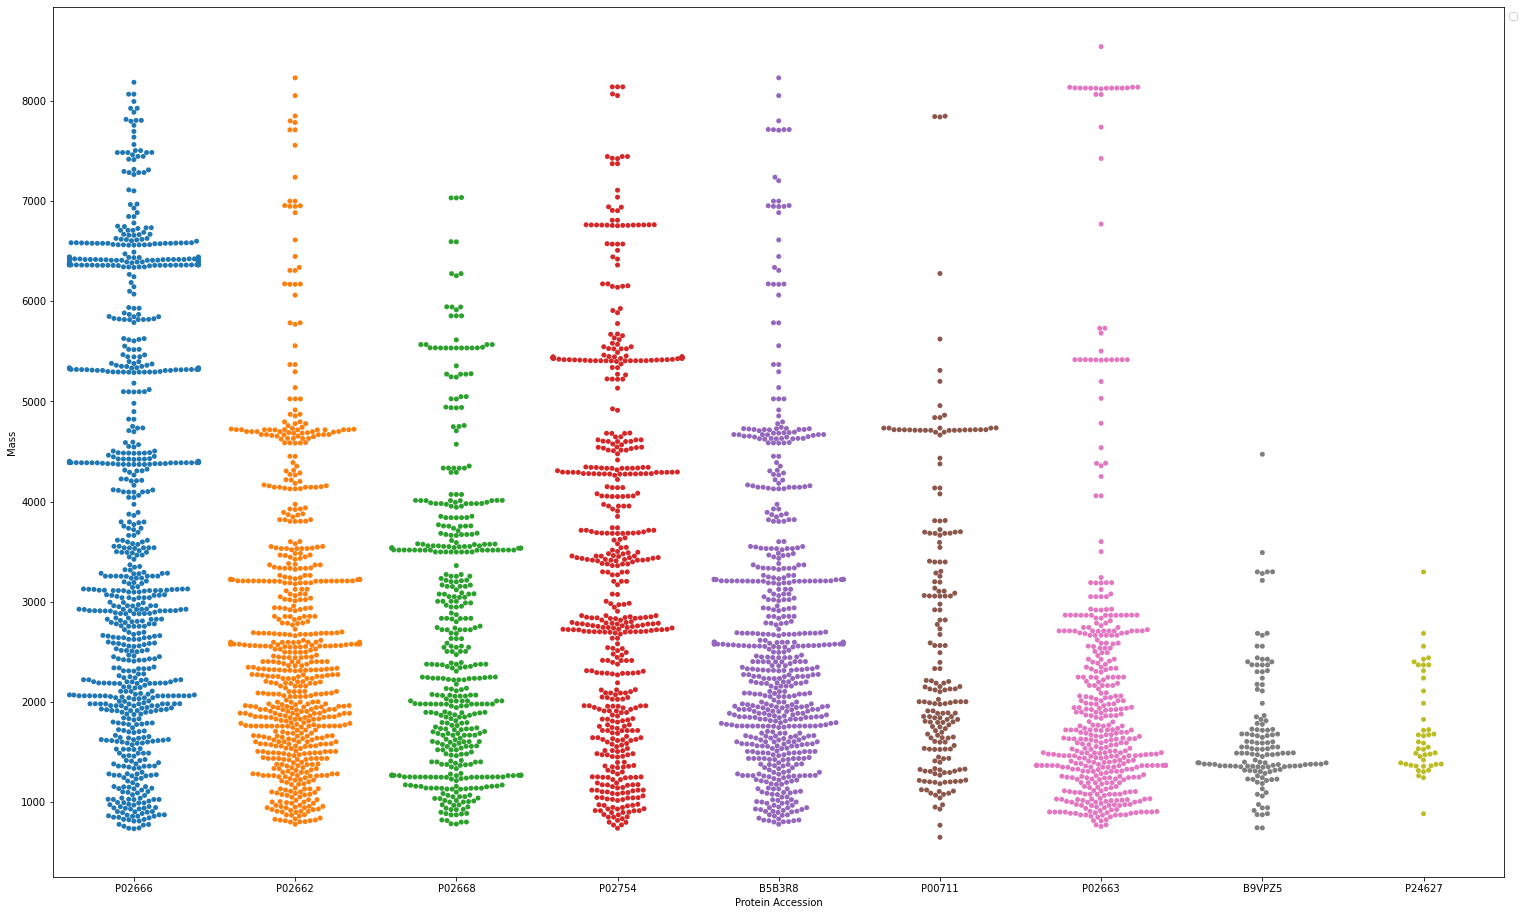

In [ ]:
df_melt = [["Protein Accession", "Mass"]]
df2 = df[:4000]
plt.figure(figsize=(26,16))
sns.swarmplot(x='Protein Accession', y='Mass', data=df2 )
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

<AxesSubplot:xlabel='Protein Accession', ylabel='Length'>

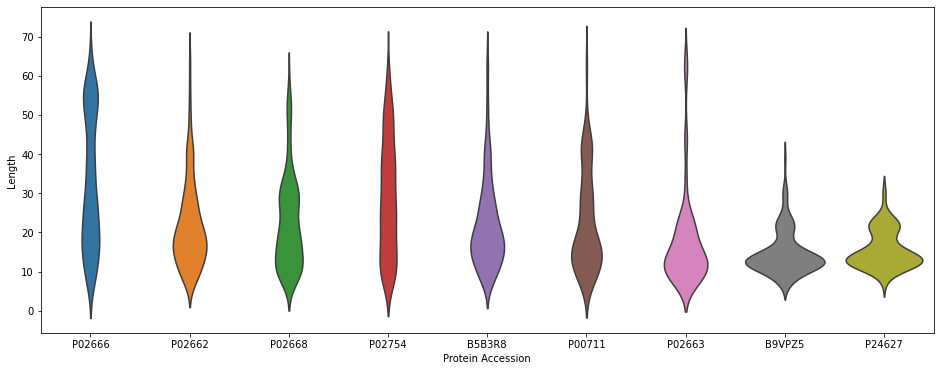

In [ ]:
plt.figure(figsize=(16,6))
sns.violinplot(x='Protein Accession', y='Length', data=df2,
               inner=None) # Remove the bars inside the violins)

In [163]:
sns.factorplot(x='Mass', 
                   y='Length', 
                   data=df, 
                   hue='#modifications',  # Color by stage
                   col='#modifications',  # Separate by stage
                   kind='swarm') # Swarmplot

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
